In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import groupby
from calendar import monthrange
from datetime import date, timedelta

# Load dataset

In [3]:
df_ranking = pd.read_csv('./data.csv')

In [4]:
df_continents = pd.Series(json.load(open('./continents.json')), name='continent').to_frame()
df_continents.index.name = 'code'
df_continents.reset_index(level=0, inplace=True)

In [5]:
df_countries = pd.read_json('./countries.json', orient='index')
df_countries.index.name = 'code'
df_countries.reset_index(level=0, inplace=True)

## See some items in dataset

In [6]:
df_ranking.head(10)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,ec
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,ec
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,ec
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,ec
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,ec


In [7]:
df_ranking.describe(include='all')

,Position,Track Name,Artist,Streams,URL,Date,Region
count,3.441197e+06,3440540,3440540,3.441197e+06,3441189,3441197,3441197
unique,NaN,18597,6628,NaN,21746,371,54
top,NaN,Shape of You,Ed Sheeran,NaN,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-12-24,cl
freq,NaN,19365,127064,NaN,19365,10073,74200
mean,9.464399e+01,NaN,NaN,5.189176e+04,NaN,NaN,NaN
std,5.739567e+01,NaN,NaN,2.018035e+05,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,1.001000e+03,NaN,NaN,NaN
25%,4.500000e+01,NaN,NaN,3.322000e+03,NaN,NaN,NaN
50%,9.200000e+01,NaN,NaN,9.227000e+03,NaN,NaN,NaN
75%,1.430000e+02,NaN,NaN,2.965800e+04,NaN,NaN,NaN


Show rows contain null

In [8]:
df_ranking[df_ranking.isnull().any(axis=1)].head(10)

,Position,Track Name,Artist,Streams,URL,Date,Region
39428,29,NaN,NaN,7362,https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-20,ec
39456,57,NaN,NaN,4426,https://open.spotify.com/track/4JAyIDXOqNM6qHu...,2017-07-20,ec
39463,64,NaN,NaN,4069,https://open.spotify.com/track/3bVbQvGVIe4n24A...,2017-07-20,ec
39490,91,NaN,NaN,3238,https://open.spotify.com/track/3eFJqPe8VUYrABb...,2017-07-20,ec
39631,32,NaN,NaN,7409,https://open.spotify.com/track/3RXkboS74UYzN14...,2017-07-21,ec
39666,67,NaN,NaN,4076,https://open.spotify.com/track/4JAyIDXOqNM6qHu...,2017-07-21,ec
39667,68,NaN,NaN,4059,https://open.spotify.com/track/3bVbQvGVIe4n24A...,2017-07-21,ec
39700,101,NaN,NaN,3227,https://open.spotify.com/track/3eFJqPe8VUYrABb...,2017-07-21,ec
39962,163,NaN,NaN,2112,https://open.spotify.com/track/6Br5mChPdgQNmLF...,2017-07-22,ec
40157,158,NaN,NaN,1905,https://open.spotify.com/track/6Br5mChPdgQNmLF...,2017-07-23,ec


In [9]:
df_ranking.isnull().sum()

Position        0
Track Name    657
Artist        657
Streams         0
URL             8
Date            0
Region          0
dtype: int64

Drop null rows

In [10]:
df_ranking.dropna(inplace=True)

In [11]:
df_ranking.describe(include='all')

,Position,Track Name,Artist,Streams,URL,Date,Region
count,3.440540e+06,3440540,3440540,3.440540e+06,3440540,3440540,3440540
unique,NaN,18597,6628,NaN,21738,371,54
top,NaN,Shape of You,Ed Sheeran,NaN,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-12-24,tr
freq,NaN,19365,127064,NaN,19365,10073,74192
mean,9.465220e+01,NaN,NaN,5.188452e+04,NaN,NaN,NaN
std,5.739412e+01,NaN,NaN,2.017733e+05,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,1.001000e+03,NaN,NaN,NaN
25%,4.500000e+01,NaN,NaN,3.321000e+03,NaN,NaN,NaN
50%,9.200000e+01,NaN,NaN,9.226000e+03,NaN,NaN,NaN
75%,1.430000e+02,NaN,NaN,2.965600e+04,NaN,NaN,NaN


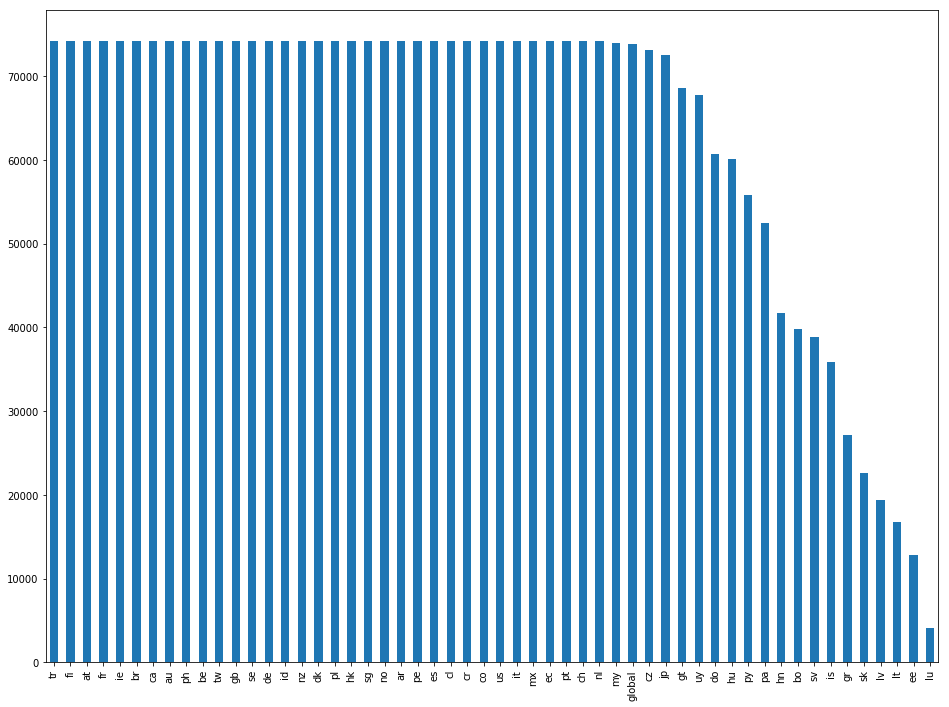

In [12]:
fig = plt.figure(figsize=(16,12))
df_ranking['Region'].value_counts().plot(kind='bar')

In [13]:
print(df_ranking['Region'].value_counts())

tr        74192
fi        74192
at        74190
fr        74190
ie        74190
br        74190
ca        74190
au        74190
ph        74190
be        74190
tw        74190
gb        74190
se        74190
de        74190
id        74190
nz        74189
dk        74189
pl        74189
hk        74188
sg        74188
no        74186
ar        74186
pe        74186
es        74185
cl        74185
cr        74184
co        74184
us        74184
it        74184
mx        74184
ec        74184
pt        74184
ch        74184
nl        74182
my        73990
global    73784
cz        73080
jp        72584
gt        68638
uy        67802
do        60732
hu        60160
py        55783
pa        52483
hn        41766
bo        39824
sv        38878
is        35825
gr        27184
sk        22589
lv        19359
lt        16791
ee        12815
lu         4094
Name: Region, dtype: int64


In [14]:
df_ranking.loc[df_ranking['Region'] == 'lu'].describe(include='all')

,Position,Track Name,Artist,Streams,URL,Date,Region
count,4094.000000,4094,4094,4094.000000,4094,4094,4094
unique,NaN,175,104,NaN,190,217,1
top,NaN,Shape of You,Ed Sheeran,NaN,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-12-24,lu
freq,NaN,212,406,NaN,212,84,4094
mean,11.440156,NaN,NaN,1468.563263,NaN,NaN,NaN
std,8.681525,NaN,NaN,500.967200,NaN,NaN,NaN
min,1.000000,NaN,NaN,1001.000000,NaN,NaN,NaN
25%,5.000000,NaN,NaN,1143.000000,NaN,NaN,NaN
50%,10.000000,NaN,NaN,1332.000000,NaN,NaN,NaN
75%,16.000000,NaN,NaN,1610.750000,NaN,NaN,NaN


In [15]:
df_continents.head(10)

,code,continent
0,AF,Africa
1,AN,Antarctica
2,AS,Asia
3,EU,Europe
4,NA,North America
5,OC,Oceania
6,SA,South America


In [16]:
df_countries.head(10)

,code,capital,continent,currency,languages,name,native,phone
0,AD,Andorra la Vella,EU,EUR,[ca],Andorra,Andorra,376
1,AE,Abu Dhabi,AS,AED,[ar],United Arab Emirates,دولة الإمارات العربية المتحدة,971
2,AF,Kabul,AS,AFN,"[ps, uz, tk]",Afghanistan,افغانستان,93
3,AG,Saint John's,NA,XCD,[en],Antigua and Barbuda,Antigua and Barbuda,1268
4,AI,The Valley,NA,XCD,[en],Anguilla,Anguilla,1264
5,AL,Tirana,EU,ALL,[sq],Albania,Shqipëria,355
6,AM,Yerevan,AS,AMD,"[hy, ru]",Armenia,Հայաստան,374
7,AO,Luanda,AF,AOA,[pt],Angola,Angola,244
8,AQ,,AN,,[],Antarctica,Antarctica,672
9,AR,Buenos Aires,SA,ARS,"[es, gn]",Argentina,Argentina,54


## A little bit preprocessing

Merge continents and countries

In [17]:
df_region = pd.merge(df_countries, df_continents, right_on='code', left_on='continent')
df_region = df_region[['code_x', 'name', 'code_y', 'continent_y']]
df_region.columns = ['country_code', 'country', 'continent_code', 'continent']
df_region.tail(10)

,country_code,country,continent_code,continent
240,PW,Palau,OC,Oceania
241,SB,Solomon Islands,OC,Oceania
242,TK,Tokelau,OC,Oceania
243,TL,East Timor,OC,Oceania
244,TO,Tonga,OC,Oceania
245,TV,Tuvalu,OC,Oceania
246,UM,U.S. Minor Outlying Islands,OC,Oceania
247,VU,Vanuatu,OC,Oceania
248,WF,Wallis and Futuna,OC,Oceania
249,WS,Samoa,OC,Oceania


Add special 'global' entry

In [18]:
df_region = df_region.append({
    'country_code': 'GLOBAL',
    'country': 'GLOBAL',
    'continent_code': 'GLOBAL',
    'continent': 'GLOBAL'
}, ignore_index=True)
df_region.tail(10)

,country_code,country,continent_code,continent
241,SB,Solomon Islands,OC,Oceania
242,TK,Tokelau,OC,Oceania
243,TL,East Timor,OC,Oceania
244,TO,Tonga,OC,Oceania
245,TV,Tuvalu,OC,Oceania
246,UM,U.S. Minor Outlying Islands,OC,Oceania
247,VU,Vanuatu,OC,Oceania
248,WF,Wallis and Futuna,OC,Oceania
249,WS,Samoa,OC,Oceania
250,GLOBAL,GLOBAL,GLOBAL,GLOBAL


Merge ranking and region

In [19]:
df_ranking['Region'] = df_ranking['Region'].str.upper()
df_ranking.head(10)

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,EC
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,EC
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,EC
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,EC
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,EC
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,EC
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,EC
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,EC
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,EC
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,EC


In [20]:
df_ranking_region = pd.merge(df_ranking, df_region, left_on='Region', right_on='country_code')
df_ranking_region.head(10)

,Position,Track Name,Artist,Streams,URL,Date,Region,country_code,country,continent_code,continent
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,EC,EC,Ecuador,SA,South America
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,EC,EC,Ecuador,SA,South America
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,EC,EC,Ecuador,SA,South America
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,EC,EC,Ecuador,SA,South America
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,EC,EC,Ecuador,SA,South America
5,6,La Bicicleta,Carlos Vives,12843,https://open.spotify.com/track/0sXvAOmXgjR2QUq...,2017-01-01,EC,EC,Ecuador,SA,South America
6,7,Ay Mi Dios,IAmChino,10986,https://open.spotify.com/track/6stYbAJgTszHAHZ...,2017-01-01,EC,EC,Ecuador,SA,South America
7,8,Andas En Mi Cabeza,Chino & Nacho,10653,https://open.spotify.com/track/5mey7CLLuFToM2P...,2017-01-01,EC,EC,Ecuador,SA,South America
8,9,Traicionera,Sebastian Yatra,9807,https://open.spotify.com/track/5J1c3M4EldCfNxX...,2017-01-01,EC,EC,Ecuador,SA,South America
9,10,Shaky Shaky,Daddy Yankee,9612,https://open.spotify.com/track/58IL315gMSTD37D...,2017-01-01,EC,EC,Ecuador,SA,South America


Extract datetime attributes

In [21]:
df_date = df_ranking_region[['Date']]
df_date = df_date.drop_duplicates()
df_date = df_date.reset_index(drop=True)
df_date = df_date.copy()
df_date['Dt'] = pd.to_datetime(df_date['Date'], infer_datetime_format=True)
df_date.head()

,Date,Dt
0,2017-01-01,2017-01-01
1,2017-01-02,2017-01-02
2,2017-01-03,2017-01-03
3,2017-01-04,2017-01-04
4,2017-01-05,2017-01-05


In [22]:
def year (d):
    return f'Y{d.year}'

print(year(df_date['Dt'][0]))

Y2017


In [23]:
def monthofyear (d):
    return 'M'.join((str(d.year), str(d.month)))

print(monthofyear(df_date['Dt'][0]))

2017M1


In [24]:
def quarterofyear (d):
    return 'Q'.join((str(d.year), str(d.quarter)))

print(quarterofyear(df_date['Dt'][0]))

2017Q1


In [25]:
def weekofyear (d):
    if d.month == 1 and d.week == 52:
        return 'W'.join((str(d.year - 1), str(d.week)))
    else:
        return 'W'.join((str(d.year), str(d.week)))

print(weekofyear(df_date['Dt'][0]))

2016W52


In [26]:
df_date.count()

Date    371
Dt      371
dtype: int64

In [27]:
df_date['Year'] = df_date['Dt'].apply(lambda x: year(x))

In [28]:
df_date['Quarterofyear'] = df_date['Dt'].apply(lambda x: quarterofyear(x))

In [29]:
df_date['Monthofyear'] = df_date['Dt'].apply(lambda x: monthofyear(x))

In [30]:
df_date['Weekofyear'] = df_date['Dt'].apply(lambda x: weekofyear(x))

In [31]:
df_date.head()

,Date,Dt,Year,Quarterofyear,Monthofyear,Weekofyear
0,2017-01-01,2017-01-01,Y2017,2017Q1,2017M1,2016W52
1,2017-01-02,2017-01-02,Y2017,2017Q1,2017M1,2017W1
2,2017-01-03,2017-01-03,Y2017,2017Q1,2017M1,2017W1
3,2017-01-04,2017-01-04,Y2017,2017Q1,2017M1,2017W1
4,2017-01-05,2017-01-05,Y2017,2017Q1,2017M1,2017W1


In [32]:
df_date.tail()

,Date,Dt,Year,Quarterofyear,Monthofyear,Weekofyear
366,2018-01-05,2018-01-05,Y2018,2018Q1,2018M1,2018W1
367,2018-01-06,2018-01-06,Y2018,2018Q1,2018M1,2018W1
368,2018-01-07,2018-01-07,Y2018,2018Q1,2018M1,2018W1
369,2018-01-08,2018-01-08,Y2018,2018Q1,2018M1,2018W2
370,2018-01-09,2018-01-09,Y2018,2018Q1,2018M1,2018W2


# Aggregate stream counts

Only use data of year 2017

In [57]:
df_ranking_2017 = df_ranking_region.merge(df_date, on='Date', how='left')
df_ranking_2017 = df_ranking_2017.loc[df_ranking_2017['Year'] == 'Y2017']
df_ranking_2017.tail()

,Position,Track Name,Artist,Streams,URL,Date,Region,country_code,country,continent_code,continent,Dt,Year,Quarterofyear,Monthofyear,Weekofyear
3438735,196,說好的幸福呢,Jay Chou,1949,https://open.spotify.com/track/6W2tmkeuHKaedHh...,2017-12-31,HK,HK,Hong Kong,AS,Asia,2017-12-31,Y2017,2017Q4,2017M12,2017W52
3438736,197,心淡,Joey Yung,1942,https://open.spotify.com/track/0Eum5dQqpUDgwJi...,2017-12-31,HK,HK,Hong Kong,AS,Asia,2017-12-31,Y2017,2017Q4,2017M12,2017W52
3438737,198,One Call Away,Charlie Puth,1938,https://open.spotify.com/track/6vSforRhuzsA0D0...,2017-12-31,HK,HK,Hong Kong,AS,Asia,2017-12-31,Y2017,2017Q4,2017M12,2017W52
3438738,199,New,Daya,1922,https://open.spotify.com/track/7y4JznkAv2W3IKw...,2017-12-31,HK,HK,Hong Kong,AS,Asia,2017-12-31,Y2017,2017Q4,2017M12,2017W52
3438739,200,Pumped Up Kicks,Foster The People,1912,https://open.spotify.com/track/7w87IxuO7BDcJ3Y...,2017-12-31,HK,HK,Hong Kong,AS,Asia,2017-12-31,Y2017,2017Q4,2017M12,2017W52


In [58]:
df_songs = df_ranking_2017[['URL', 'Track Name', 'Artist']].drop_duplicates(['URL'])
df_songs.count()

URL           21372
Track Name    21372
Artist        21372
dtype: int64

## Sum up streams counts

In [59]:
df_ranking_continent = df_ranking_2017.groupby(['URL', 'continent', 'Date'])['Streams'].sum()
df_ranking_continent = df_ranking_continent.reset_index()
df_ranking_continent = df_ranking_continent.merge(df_date, on='Date', how='left')
df_ranking_continent.head()

,URL,continent,Date,Streams,Dt,Year,Quarterofyear,Monthofyear,Weekofyear
0,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-24,75974,2017-03-24,Y2017,2017Q1,2017M3,2017W12
1,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-25,65583,2017-03-25,Y2017,2017Q1,2017M3,2017W12
2,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-26,70725,2017-03-26,Y2017,2017Q1,2017M3,2017W12
3,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-27,109785,2017-03-27,Y2017,2017Q1,2017M3,2017W13
4,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-28,127947,2017-03-28,Y2017,2017Q1,2017M3,2017W13


In [60]:
df_ranking_continent_daily = df_ranking_continent.merge(df_songs, on='URL', how='left')
df_ranking_continent_daily.head()

,URL,continent,Date,Streams,Dt,Year,Quarterofyear,Monthofyear,Weekofyear,Track Name,Artist
0,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-24,75974,2017-03-24,Y2017,2017Q1,2017M3,2017W12,Still Got Time,ZAYN
1,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-25,65583,2017-03-25,Y2017,2017Q1,2017M3,2017W12,Still Got Time,ZAYN
2,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-26,70725,2017-03-26,Y2017,2017Q1,2017M3,2017W12,Still Got Time,ZAYN
3,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-27,109785,2017-03-27,Y2017,2017Q1,2017M3,2017W13,Still Got Time,ZAYN
4,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017-03-28,127947,2017-03-28,Y2017,2017Q1,2017M3,2017W13,Still Got Time,ZAYN


In [61]:
df_ranking_continent_monthly = df_ranking_continent.groupby(['URL', 'continent', 'Monthofyear'])['Streams'].sum()
df_ranking_continent_monthly = df_ranking_continent_monthly.reset_index()
df_ranking_continent_monthly = df_ranking_continent_monthly.merge(df_songs, on='URL', how='left')
df_ranking_continent_monthly.head()

,URL,continent,Monthofyear,Streams,Track Name,Artist
0,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017M10,32634,Still Got Time,ZAYN
1,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017M3,874491,Still Got Time,ZAYN
2,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017M4,3112507,Still Got Time,ZAYN
3,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017M5,2534771,Still Got Time,ZAYN
4,https://open.spotify.com/track/000xQL6tZNLJzIr...,Asia,2017M6,411846,Still Got Time,ZAYN


## Rank songs by streams counts

In [62]:
df_ranking_continent_monthly['rank'] = df_ranking_continent_monthly.groupby(['Monthofyear', 'continent'])['Streams'].rank(ascending=False)

In [63]:
df_ranking_continent_monthly.sort_values(['rank', 'Streams'], ascending=[True, False]).head(50)

,URL,continent,Monthofyear,Streams,Track Name,Artist,rank
76451,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017M3,230310961,Shape of You,Ed Sheeran,1.0
76450,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017M2,200107746,Shape of You,Ed Sheeran,1.0
50972,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,GLOBAL,2017M5,194869891,Despacito - Remix,Luis Fonsi,1.0
50973,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,GLOBAL,2017M6,192288014,Despacito - Remix,Luis Fonsi,1.0
76446,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017M1,183196416,Shape of You,Ed Sheeran,1.0
76452,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017M4,170178172,Shape of You,Ed Sheeran,1.0
77456,https://open.spotify.com/track/7wGoVu4Dady5GV0...,GLOBAL,2017M11,163355331,rockstar,Post Malone,1.0
50974,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,GLOBAL,2017M7,162373024,Despacito - Remix,Luis Fonsi,1.0
77457,https://open.spotify.com/track/7wGoVu4Dady5GV0...,GLOBAL,2017M12,143424681,rockstar,Post Malone,1.0
28705,https://open.spotify.com/track/2rb5MvYT7ZIxbKW...,GLOBAL,2017M8,140837346,Mi Gente,J Balvin,1.0


In [64]:
def reranking (df,
               sum_groupby_fields=['URL', 'Date', 'country'],
               rank_groupby_fields=['Date', 'country'],
               rank_field='Streams',
               ascending=False):
    df_ret = df.groupby(sum_groupby_fields)[rank_field].sum()
    df_ret = df_ret.reset_index()
    df_ret = df_ret.merge(df_songs, on='URL', how='left')
    df_ret['rank'] = df_ret.groupby(rank_groupby_fields)[rank_field].rank(ascending=ascending)
    return df_ret
reranking(df_ranking_2017,
          sum_groupby_fields=['URL', 'continent', 'Monthofyear'],
          rank_groupby_fields=['continent', 'Monthofyear']).sort_values(['rank', 'Streams'], ascending=[True, False]).head()

,URL,continent,Monthofyear,Streams,Track Name,Artist,rank
76451,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017M3,230310961,Shape of You,Ed Sheeran,1.0
76450,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017M2,200107746,Shape of You,Ed Sheeran,1.0
50972,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,GLOBAL,2017M5,194869891,Despacito - Remix,Luis Fonsi,1.0
50973,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,GLOBAL,2017M6,192288014,Despacito - Remix,Luis Fonsi,1.0
76446,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,2017M1,183196416,Shape of You,Ed Sheeran,1.0


In [65]:
df_ranking_country_daily = reranking(df_ranking_2017, ['URL', 'country', 'Date'], ['country', 'Date'])
df_ranking_country_weekly = reranking(df_ranking_2017, ['URL', 'country', 'Weekofyear'], ['country', 'Weekofyear'])
df_ranking_country_monthly = reranking(df_ranking_2017, ['URL', 'country', 'Monthofyear'], ['country', 'Monthofyear'])
df_ranking_country_quarterly = reranking(df_ranking_2017, ['URL', 'country', 'Quarterofyear'], ['country', 'Quarterofyear'])
df_ranking_country_yearly = reranking(df_ranking_2017, ['URL', 'country', 'Year'], ['country', 'Year'])

In [66]:
df_ranking_country_yearly.sort_values(['rank', 'Streams'], ascending=[True, False]).head()

,URL,country,Year,Streams,Track Name,Artist,rank
71890,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,Y2017,1470919913,Shape of You,Ed Sheeran,1.0
68472,https://open.spotify.com/track/7KXjTSCq5nL1LoY...,United States,Y2017,334342280,HUMBLE.,Kendrick Lamar,1.0
71923,https://open.spotify.com/track/7qiZfU4dY1lWllz...,United Kingdom,Y2017,130658891,Shape of You,Ed Sheeran,1.0
57758,https://open.spotify.com/track/6De0lHrwBfPfrho...,Mexico,Y2017,110639286,Me Rehúso,Danny Ocean,1.0
71891,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Germany,Y2017,96505235,Shape of You,Ed Sheeran,1.0


In [67]:
df_ranking_continent_daily = reranking(df_ranking_2017, ['URL', 'continent', 'Date'], ['continent', 'Date'])
df_ranking_continent_weekly = reranking(df_ranking_2017, ['URL', 'continent', 'Weekofyear'], ['continent', 'Weekofyear'])
df_ranking_continent_monthly = reranking(df_ranking_2017, ['URL', 'continent', 'Monthofyear'], ['continent', 'Monthofyear'])
df_ranking_continent_quarterly = reranking(df_ranking_2017, ['URL', 'continent', 'Quarterofyear'], ['continent', 'Quarterofyear'])
df_ranking_continent_yearly = reranking(df_ranking_2017, ['URL', 'continent', 'Year'], ['continent', 'Year'])

In [68]:
df_ranking_continent_yearly.sort_values(['rank', 'Streams'], ascending=[True, False]).head()

,URL,continent,Year,Streams,Track Name,Artist,rank
28886,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,Y2017,1470919913,Shape of You,Ed Sheeran,1.0
28885,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,Y2017,637859842,Shape of You,Ed Sheeran,1.0
28887,https://open.spotify.com/track/7qiZfU4dY1lWllz...,North America,Y2017,429524381,Shape of You,Ed Sheeran,1.0
28889,https://open.spotify.com/track/7qiZfU4dY1lWllz...,South America,Y2017,208909608,Shape of You,Ed Sheeran,1.0
28884,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Asia,Y2017,142867378,Shape of You,Ed Sheeran,1.0


In [69]:
df_ranking_continent_yearly.sort_values(['Streams'], ascending=[False]).head(10)

,URL,continent,Year,Streams,Track Name,Artist,rank
28886,https://open.spotify.com/track/7qiZfU4dY1lWllz...,GLOBAL,Y2017,1470919913,Shape of You,Ed Sheeran,1.0
19464,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,GLOBAL,Y2017,908572590,Despacito - Remix,Luis Fonsi,2.0
17174,https://open.spotify.com/track/4aWmUDTfIPGksMN...,GLOBAL,Y2017,735938109,Despacito (Featuring Daddy Yankee),Luis Fonsi,3.0
24265,https://open.spotify.com/track/6RUKPb4LETWmmr3...,GLOBAL,Y2017,682354910,Something Just Like This,The Chainsmokers,4.0
27613,https://open.spotify.com/track/7KXjTSCq5nL1LoY...,GLOBAL,Y2017,650411808,HUMBLE.,Kendrick Lamar,5.0
28885,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,Y2017,637859842,Shape of You,Ed Sheeran,1.0
13785,https://open.spotify.com/track/3eR23VReFzcdmS7...,GLOBAL,Y2017,597594929,It Ain't Me (with Selena Gomez),Kygo,6.0
1206,https://open.spotify.com/track/0KKkJNfGyhkQ5aF...,GLOBAL,Y2017,571097174,That's What I Like,Bruno Mars,7.0
12755,https://open.spotify.com/track/3NdDpSvN911VPGi...,GLOBAL,Y2017,563210853,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,8.0
17654,https://open.spotify.com/track/4iLqG9SeJSnt0cS...,GLOBAL,Y2017,548092636,Attention,Charlie Puth,9.0


# Make ranking as events

In [70]:
song_list = df_songs.to_dict(orient='records')

In [71]:
songs = {}
for song in song_list:
    songs[song['URL']] = song

Make ranking records as sequences

In [72]:
def add_ranking (songs, df, field):
    for r in df.to_dict(orient='records'):
        song = songs[r['URL']]
        if field in song:
            song[field].append(r)
        else:
            song[field] = [r]

In [73]:
add_ranking(songs, df_ranking_country_daily, 'country_daily')
add_ranking(songs, df_ranking_country_weekly, 'country_weekly')
add_ranking(songs, df_ranking_country_monthly, 'country_monthly')
add_ranking(songs, df_ranking_country_quarterly, 'country_quarterly')
add_ranking(songs, df_ranking_country_yearly, 'country_yearly')
add_ranking(songs, df_ranking_continent_daily, 'continent_daily')
add_ranking(songs, df_ranking_continent_weekly, 'continent_weekly')
add_ranking(songs, df_ranking_continent_monthly, 'continent_monthly')
add_ranking(songs, df_ranking_continent_quarterly, 'continent_quarterly')
add_ranking(songs, df_ranking_continent_yearly, 'continent_yearly')

In [74]:
#json.dump(songs, open('./songs.json', 'w'))

In [90]:
def get_start_end_dates(year, week):
    d = date(year, 1, 1)
    if d.weekday() <= 3:
        d = d - timedelta(d.weekday())             
    else:
        d = d + timedelta(7 - d.weekday())
    dlt = timedelta(days = (week - 1) * 7)
    return d + dlt,  d + dlt + timedelta(days=6)

def lastdate (d):
    if 'Y' in d:
        y = d.split('Y')[1]
        y = int(y)
        return date(y, 12, 31)
    elif 'Q' in d:
        y, q = d.split('Q')
        y = int(y)
        q = int(q)
        return date(y, q * 3, monthrange(y, q * 3)[1])
    elif 'M' in d:
        y, m = d.split('M')
        y = int(y)
        m = int(m)
        return date(y, m, monthrange(y, m)[1])
    elif 'W' in d:
        y, w = d.split('W')
        y = int(y)
        w = int(w)
        return get_start_end_dates(y, w)[1]

print(lastdate('Y2017'))
print(lastdate('2017Q2'))
print(lastdate('2017M2'))
print(lastdate('2016W52'))
print(lastdate('2017W52'))

2017-12-31
2017-06-30
2017-02-28
2017-01-01
2017-12-31


In [76]:
ranges = [1, 3, 10, 20, 50, 100]
def find_range (ranges, rank):
    if (ranges[0] >= rank):
        return ranges[0]
    if (len(ranges) > 1):
        return find_range(ranges[1:], rank)
    else:
        return None
print(find_range(ranges, 2)) # 3
print(find_range(ranges, 1)) # 1
print(find_range(ranges, 200)) # None
print(find_range(ranges, 50)) # 50
print(find_range(ranges, 51)) # 100

3
1
None
50
100


In [77]:
def add_big_events (song, field, region, dt_field):
    for r in song[field]:
        if r['rank'] < 100:
            event = f'{r[dt_field]} Ranked {r["rank"]:.0f} in {r[region]}'
            if field+'_events' in song:
                song[field+'_events'].append(event)
            else:
                song[field+'_events'] = [event]
    if field+'_events' in song:
        song[field+'_events'].sort()

In [117]:
def add_events (song, field, region, dt_field):
    for k, g in groupby(song[field], key=lambda r: r[region]):
        prev_rank_range = 200
        rank_range = 200
        records = sorted(g, key=lambda x: lastdate(x[dt_field].split(' ')[0]))
        for r in records:
            prev_rank_range = rank_range
            rank_range = find_range(ranges, r['rank'])
            rank_range = 200 if rank_range == None else rank_range
            if rank_range != prev_rank_range:
                event = ''
                if rank_range < prev_rank_range:
                    if rank_range == 1:
                        event = f'{r[dt_field]} Get #1 in {r[region]}'
                    else:
                        event = f'{r[dt_field]} Get into top {rank_range} in {r[region]}'
                elif rank_range > prev_rank_range:
                    if prev_rank_range == 1:
                        event = f'{r[dt_field]} Lost #1 in {r[region]}'
                    else:
                        event = f'{r[dt_field]} Drop out of top {prev_rank_range} in {r[region]}'
                if event != '':
                    event = f'{event} rank: {r["rank"]:.0f}'
                    if field+'_events' in song:
                        song[field+'_events'].append(event)
                    else:
                        song[field+'_events'] = [event]
    if field+'_events' in song:
        song[field+'_events'] = sorted(song[field+'_events'], key=lambda x: lastdate(x.split(' ')[0]))

In [118]:
for url in songs:
    song = songs[url]
    for field, dt_field in [('continent_weekly', 'Weekofyear'), ('continent_monthly', 'Monthofyear'), ('continent_quarterly', 'Quarterofyear')]:
        song.pop(field+'_events', None)
        add_events(song, field, 'continent', dt_field)
    song.pop('continent_yearly_events', None)
    add_big_events(song, 'continent_yearly', 'continent', 'Year')

In [119]:
songs['https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3']['continent_weekly_events']

['2017W1 Get into top 20 in Asia rank: 18',
 '2017W1 Get into top 3 in Europe rank: 2',
 '2017W1 Get into top 10 in GLOBAL rank: 4',
 '2017W1 Get into top 10 in North America rank: 10',
 '2017W1 Get into top 20 in Oceania rank: 13',
 '2017W1 Get into top 50 in South America rank: 30',
 '2017W2 Get #1 in Asia rank: 1',
 '2017W2 Get #1 in Europe rank: 1',
 '2017W2 Get #1 in GLOBAL rank: 1',
 '2017W2 Get #1 in North America rank: 1',
 '2017W2 Get #1 in Oceania rank: 1',
 '2017W2 Get into top 3 in South America rank: 2',
 '2017W10 Get #1 in South America rank: 1',
 '2017W12 Lost #1 in North America rank: 2',
 '2017W15 Lost #1 in Oceania rank: 2',
 '2017W16 Lost #1 in GLOBAL rank: 2',
 '2017W16 Drop out of top 3 in North America rank: 7',
 '2017W16 Lost #1 in South America rank: 2',
 '2017W17 Lost #1 in Europe rank: 2',
 '2017W19 Drop out of top 3 in Oceania rank: 4',
 '2017W21 Drop out of top 3 in Europe rank: 4',
 '2017W21 Drop out of top 3 in GLOBAL rank: 4',
 '2017W22 Lost #1 in Asia ra

In [120]:
df_ranking_continent_weekly.query("continent == 'Europe' and rank == 1").sort_values("Weekofyear")

,URL,continent,Weekofyear,Streams,Track Name,Artist,rank
172084,https://open.spotify.com/track/5knuzwU65gJK7IF...,Europe,2016W52,1286645,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1.0
172085,https://open.spotify.com/track/5knuzwU65gJK7IF...,Europe,2017W1,11630117,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,1.0
233395,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,2017W10,26732440,Shape of You,Ed Sheeran,1.0
233396,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,2017W11,23288910,Shape of You,Ed Sheeran,1.0
233397,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,2017W12,21224944,Shape of You,Ed Sheeran,1.0
233398,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,2017W13,19875301,Shape of You,Ed Sheeran,1.0
233399,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,2017W14,18591861,Shape of You,Ed Sheeran,1.0
233400,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,2017W15,16845558,Shape of You,Ed Sheeran,1.0
233401,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Europe,2017W16,15470188,Shape of You,Ed Sheeran,1.0
154893,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,Europe,2017W17,17382831,Despacito - Remix,Luis Fonsi,1.0


In [121]:
for url in songs:
    song = songs[url]
    song['events'] = []
    for event in ['continent_weekly_events', 'continent_monthly_events', 'continent_quarterly_events', 'continent_yearly_events']:
        if event in song:
            song['events'] += song[event]
    song['events'] = sorted(song['events'], key=lambda x: lastdate(x.split(' ')[0]))
songs['https://open.spotify.com/track/7qiZfU4dY1lWllzX7mPBI3']['events']

['2017W1 Get into top 20 in Asia rank: 18',
 '2017W1 Get into top 3 in Europe rank: 2',
 '2017W1 Get into top 10 in GLOBAL rank: 4',
 '2017W1 Get into top 10 in North America rank: 10',
 '2017W1 Get into top 20 in Oceania rank: 13',
 '2017W1 Get into top 50 in South America rank: 30',
 '2017W2 Get #1 in Asia rank: 1',
 '2017W2 Get #1 in Europe rank: 1',
 '2017W2 Get #1 in GLOBAL rank: 1',
 '2017W2 Get #1 in North America rank: 1',
 '2017W2 Get #1 in Oceania rank: 1',
 '2017W2 Get into top 3 in South America rank: 2',
 '2017M1 Get #1 in Asia rank: 1',
 '2017M1 Get #1 in Europe rank: 1',
 '2017M1 Get #1 in GLOBAL rank: 1',
 '2017M1 Get #1 in North America rank: 1',
 '2017M1 Get #1 in Oceania rank: 1',
 '2017M1 Get into top 3 in South America rank: 3',
 '2017W10 Get #1 in South America rank: 1',
 '2017W12 Lost #1 in North America rank: 2',
 '2017M3 Get #1 in South America rank: 1',
 '2017Q1 Get #1 in Asia rank: 1',
 '2017Q1 Get #1 in Europe rank: 1',
 '2017Q1 Get #1 in GLOBAL rank: 1',
 '

In [129]:
f = open('spotify-eventseq.jsonl', 'w')
for url in songs:
    song = songs[url]
    song = {
        'url': song['URL'],
        'trackName': song['Track Name'],
        'artist': song['Artist'],
        'events': [{'title': event, 'date': str(lastdate(event.split(' ')[0]))} for event in song['events']]
    }
    f.write(json.dumps(song))
    f.write('\n')
f.flush()